In [1]:
import numpy as np
from tqdm import tqdm
from UCRL2_L import UCRL2_L, VI, plot, riverswim


nS = 6
env = riverswim(nS)
epsilon = 0.01
delta = 0.05
delta_mod = 1/4 * delta

# Set the time horizon:
T = 3 * 10**5
nb_Replicates = 50

# Set the learning agents:
UCRL2L = UCRL2_L(nS, 2, delta)
UCRL2 = UCRL2_L(nS, 2, delta_mod, modified=True)

# Set the variables used for plotting.
cumregret_UCRL2L = [[0] for _ in range(nb_Replicates)]
cumrewards_UCRL2L = [[0] for _ in range(nb_Replicates)]

cumregret_UCRL2 = [[0] for _ in range(nb_Replicates)]
cumrewards_UCRL2 = [[0] for _ in range(nb_Replicates)]

# Estimate the optimal gain.
print(
    "Estimating the optimal gain...",
)
_, _, _, gstar = VI(env, 10**6, 10 ** (-6))
episode_counts = np.zeros((nb_Replicates, 2))
# Run the experiments:
print("Running experiments...")
for i in tqdm(range(nb_Replicates)):
    # Running an instance of UCRL2-L:
    env.reset()    
    UCRL2L.reset(env.s)    
    reward = 0
    new_s = env.s
    for _ in range(T):
        action, _ = UCRL2L.play(new_s, reward)
        new_s, reward = env.step(action)
        cumregret_UCRL2L[i].append(cumregret_UCRL2L[i][-1] + gstar - reward)
        cumrewards_UCRL2L[i].append(cumrewards_UCRL2L[i][-1] + reward)
        
    episode_counts[i, 0] = UCRL2L.episode_count
        
    env.reset()    
    UCRL2.reset(env.s)
    reward = 0
    new_s = env.s
    for _ in range(T):
        action, _ = UCRL2.play(new_s, reward)
        new_s, reward = env.step(action)
        cumregret_UCRL2[i].append(cumregret_UCRL2[i][-1] + gstar - reward)
        cumrewards_UCRL2[i].append(cumrewards_UCRL2[i][-1] + reward)
        
    episode_counts[i, 1] = UCRL2.episode_count

Estimating the optimal gain...
Running experiments...


100%|██████████| 50/50 [07:16<00:00,  8.73s/it]



Plotting...


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


UCRL2_L average episode count:  56.7
UCRL2 average episode count:  77.9
Done!


<Figure size 640x480 with 0 Axes>

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


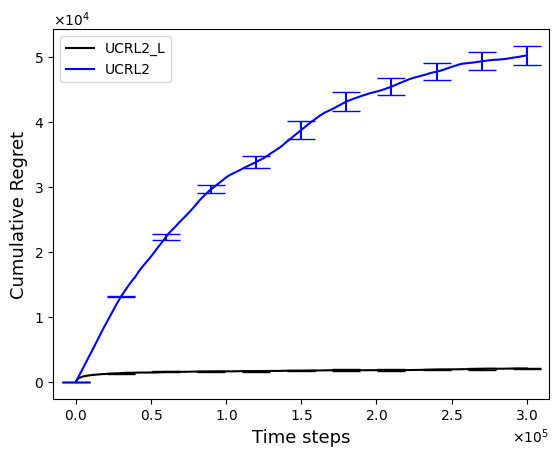

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


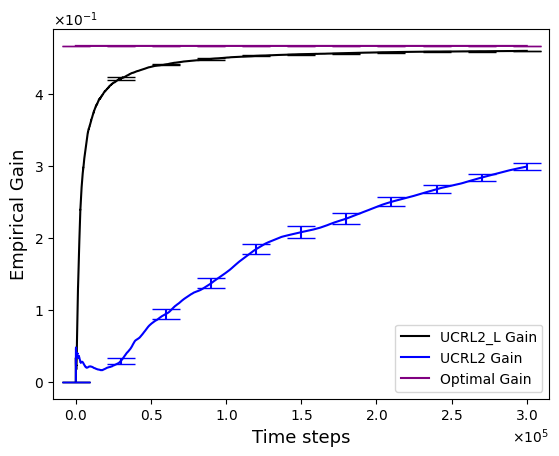

In [3]:
# Plot and finish.
print("\nPlotting...")
plot(
    [cumregret_UCRL2L, cumregret_UCRL2],
    ["UCRL2_L", "UCRL2"],
    y_label="Cumulative Regret",
    exp_name="cumulative_regret",
    q="2"
)

# Plot the empirical gain r_t under each algorithm and the optimal gain, g_star
empirical_gain_UCRL2L = cumrewards_UCRL2L / np.arange(1, T+2)
empirical_gain_UCRL2 = cumrewards_UCRL2/ np.arange(1, T+2)
optimal_gain = np.full((nb_Replicates, T+1), gstar)
plot([empirical_gain_UCRL2L, empirical_gain_UCRL2, optimal_gain], ["UCRL2_L Gain", "UCRL2 Gain", "Optimal Gain"], y_label="Empirical Gain", exp_name="empirical_gain", q="2")

print("UCRL2_L average episode count: ", np.mean(episode_counts[:, 0]))
print("UCRL2 average episode count: ", np.mean(episode_counts[:, 1]))
print("Done!")